In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o CSV da Netflix como um DataFrame
netflix_df = pd.read_csv("/content/drive/MyDrive/CSVs/netflix_data.csv")
print(netflix_df.head())

  show_id     type  title           director  \
0      s2    Movie   7:19  Jorge Michel Grau   
1      s3    Movie  23:59       Gilbert Chan   
2      s4    Movie      9        Shane Acker   
3      s5    Movie     21     Robert Luketic   
4      s6  TV Show     46        Serdar Akar   

                                                cast        country  \
0  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
1  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
2  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
3  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
4  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   

          date_added  release_year  duration  \
0  December 23, 2016          2016        93   
1  December 20, 2018          2011        78   
2  November 16, 2017          2009        80   
3    January 1, 2020          2008       123   
4       July 1, 2017          2016         1

In [ ]:
print(netflix_df.info())
print(netflix_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB
None
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')


In [ ]:
# Filtrando as colunas que serão úteis no projeto
filmes_filtrados = netflix_df[["title", "release_year", "duration", "genre"]]

# Modelando dados e preparando para análise
filmes_1990 = filmes_filtrados[(filmes_filtrados["release_year"] >= 1990 ) & ( filmes_filtrados["release_year"] <= 1999)].sort_values(by='release_year')
print(filmes_1990.to_string(index=False))

                                                  title  release_year  duration          genre
                            In Defense of a Married Man          1990        94         Dramas
                                                Rocky V          1990       104         Dramas
                                                 Ghayal          1990       163         Action
                                      Look Out, Officer          1990        88         Action
                                             GoodFellas          1990       145 Classic Movies
                                Tim Allen: Men Are Pigs          1990        30       Stand-Up
                                           Total Recall          1990       114         Action
                                     Quigley Down Under          1990       120         Action
                                                Tremors          1990        96       Comedies
                                       Unspeakable

In [ ]:
print(filmes_1990.count())

title           184
release_year    184
duration        184
genre           184
dtype: int64


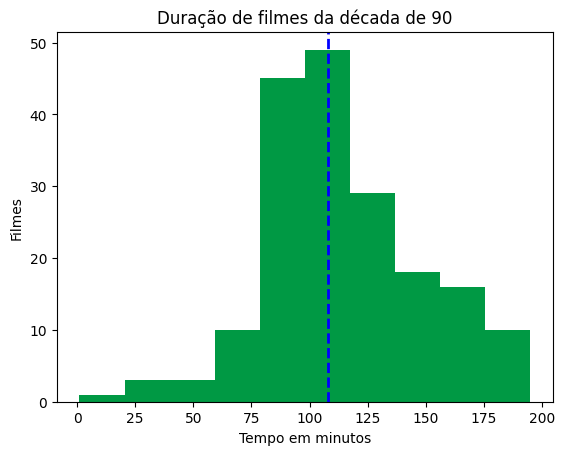


A duração mais frequente dos filmes na década de 90 é de 108 minutos.


In [ ]:
# Calculando a mediana da duração dos filmes
median = int(np.median(filmes_1990["duration"]))

# Representação gráfica
plt.hist(filmes_1990['duration'], bins=10, color='#009944')
plt.axvline(median, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Tempo em minutos')
plt.ylabel('Filmes')
plt.title('Duração de filmes da década de 90')
plt.show()
print(f"\nA duração mais frequente dos filmes na década de 90 é de {median} minutos.")

In [ ]:
# Filmes de ação considerados curtos
movie_count = []

for index, row in filmes_1990.iterrows():
    if row['duration'] < 90 and row['genre'] == 'Comedies':
        movie_count.append(row['title'])
    short_movie_count = len(movie_count)

print("Os filmes comédia considerados curtos são:\n")
for i, filme in enumerate(movie_count, start=1):
    print(f"{i}. {filme}")

Os filmes comédia considerados curtos são:

1. Escape from the "Liberty" Cinema
2. Bebe's Kids
3. The Mad Monk
4. Beavis and Butt-head Do America
5. Bean: The Ultimate Disaster Movie
6. A Night at the Roxbury
7. One Last Shot
8. Superstar
